In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
TB_data = pd.read_csv("TB_burden.csv")

In [9]:
TB_data.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20779953,190.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,18.0,13.0,28.0
1,Afghanistan,AF,AFG,4,EMR,2001,21606988,189.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,25.0,17.0,38.0
2,Afghanistan,AF,AFG,4,EMR,2002,22600770,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,32.0,23.0,50.0
3,Afghanistan,AF,AFG,4,EMR,2003,23680871,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,31.0,22.0,48.0
4,Afghanistan,AF,AFG,4,EMR,2004,24726684,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,74.0,39.0,28.0,61.0


In [10]:
TB_data.shape

(4040, 50)

In [11]:
missing_obs = TB_data.isna().sum()

In [12]:
missing_proportion = missing_obs / 4040

In [13]:
print(missing_proportion)

country                     0.000000
iso2                        0.004703
iso3                        0.000000
iso_numeric                 0.000000
g_whoregion                 0.000000
year                        0.000000
e_pop_num                   0.000000
e_inc_100k                  0.000000
e_inc_100k_lo               0.000000
e_inc_100k_hi               0.000000
e_inc_num                   0.000000
e_inc_num_lo                0.000000
e_inc_num_hi                0.000000
e_tbhiv_prct                0.151733
e_tbhiv_prct_lo             0.151733
e_tbhiv_prct_hi             0.151733
e_inc_tbhiv_100k            0.151733
e_inc_tbhiv_100k_lo         0.151733
e_inc_tbhiv_100k_hi         0.151733
e_inc_tbhiv_num             0.151733
e_inc_tbhiv_num_lo          0.151733
e_inc_tbhiv_num_hi          0.151733
e_mort_exc_tbhiv_100k       0.000000
e_mort_exc_tbhiv_100k_lo    0.000000
e_mort_exc_tbhiv_100k_hi    0.000000
e_mort_exc_tbhiv_num        0.000000
e_mort_exc_tbhiv_num_lo     0.000000
e

In [14]:
print(TB_data["g_whoregion"])

0       EMR
1       EMR
2       EMR
3       EMR
4       EMR
       ... 
4035    AFR
4036    AFR
4037    AFR
4038    AFR
4039    AFR
Name: g_whoregion, Length: 4040, dtype: object


In [15]:
TB_data["g_whoregion"].value_counts()

EUR    1016
AFR     882
AMR     844
WPR     684
EMR     407
SEA     207
Name: g_whoregion, dtype: int64

In [16]:
#WHO region codes at -> https://apps.who.int/gho/data/node.metadata.REGION?lang=en

In [17]:
geo_regions = ["EUR", "AFR", "AMR", "WPR", "EMR", "SEA"]

In [18]:
TB_data["year"].value_counts()

2017    216
2015    216
2012    216
2014    216
2016    216
2018    216
2011    216
2013    216
2010    214
2005    211
2007    211
2009    211
2008    211
2006    211
2003    209
2004    209
2002    209
2001    208
2000    208
Name: year, dtype: int64

In [19]:
TB_data_2013 = TB_data[TB_data["year"] == 2013]

In [20]:
print(TB_data_2013)

                        country iso2 iso3  iso_numeric g_whoregion  year  \
13                  Afghanistan   AF  AFG            4         EMR  2013   
32                      Albania   AL  ALB            8         EUR  2013   
51                      Algeria   DZ  DZA           12         AFR  2013   
70               American Samoa   AS  ASM           16         WPR  2013   
89                      Andorra   AD  AND           20         EUR  2013   
...                         ...  ...  ...          ...         ...   ...   
3958  Wallis and Futuna Islands   WF  WLF          876         WPR  2013   
3977   West Bank and Gaza Strip   PS  PSE          275         EMR  2013   
3996                      Yemen   YE  YEM          887         EMR  2013   
4015                     Zambia   ZM  ZMB          894         AFR  2013   
4034                   Zimbabwe   ZW  ZWE          716         AFR  2013   

      e_pop_num  e_inc_100k  e_inc_100k_lo  e_inc_100k_hi  ...  cfr  cfr_lo  \
13     3

In [21]:
TB_data_2013["c_newinc_100k"].sum()

15364.89

In [22]:
type(TB_data_2013) 

pandas.core.frame.DataFrame

In [23]:
def data_by_year(x, y):
    TB_data_year = TB_data[TB_data["year"]==x]
    return (TB_data_year[str(y)].sum())

In [24]:
data_by_year(2013, "c_newinc_100k")

15364.89

In [25]:
list_of_years = (TB_data.drop_duplicates("year")["year"]).tolist()

In [26]:
print(list_of_years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [27]:
type(list_of_years)

list

In [28]:
e_inc_num_by_year = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_year = TB_data[TB_data["year"]==x]
        return TB_data_year["e_inc_num"].sum()
    e_inc_num_by_year.append(data_by_year(x))

In [29]:
print(e_inc_num_by_year)

[10476586, 10613505, 10726918, 10853891, 10903605, 10956014, 10947674, 10913152, 10871479, 10844984, 10725368, 10725448, 10659321, 10529059, 10445574, 10336468, 10195131, 10106416, 10018345]


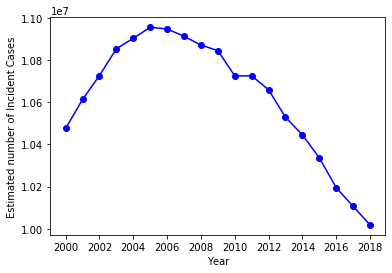

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_of_years, e_inc_num_by_year, "bo", linestyle="solid")
ax.set_xlabel("Year")
ax.set_ylabel("Estimated number of Incident Cases")
ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
#FIGURE OUT Y TICKS!!!
plt.show()

In [31]:
TB_data_EMR = TB_data[TB_data["g_whoregion"] == "EMR"]

In [32]:
e_inc_num_by_EMRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_EMRyear = TB_data_EMR[TB_data_EMR["year"]==x]
        return TB_data_EMRyear["e_inc_num"].sum()
    e_inc_num_by_EMRyear.append(data_by_year(x))

In [33]:
TB_data_AFR = TB_data[TB_data["g_whoregion"] == "AFR"]

In [34]:
e_inc_num_by_AFRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_AFRyear = TB_data_AFR[TB_data_AFR["year"]==x]
        return TB_data_AFRyear["e_inc_num"].sum()
    e_inc_num_by_AFRyear.append(data_by_year(x))

In [35]:
TB_data_EUR = TB_data[TB_data["g_whoregion"] == "EUR"]

In [36]:
e_inc_num_by_EURyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_EURyear = TB_data_EUR[TB_data_EUR["year"]==x]
        return TB_data_EURyear["e_inc_num"].sum()
    e_inc_num_by_EURyear.append(data_by_year(x))

In [37]:
TB_data_AMR = TB_data[TB_data["g_whoregion"] == "AMR"]

In [38]:
e_inc_num_by_AMRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_AMRyear = TB_data_AMR[TB_data_AMR["year"]==x]
        return TB_data_AMRyear["e_inc_num"].sum()
    e_inc_num_by_AMRyear.append(data_by_year(x))

In [39]:
TB_data_WPR = TB_data[TB_data["g_whoregion"] == "WPR"]

In [40]:
e_inc_num_by_WPRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_WPRyear = TB_data_WPR[TB_data_WPR["year"]==x]
        return TB_data_WPRyear["e_inc_num"].sum()
    e_inc_num_by_WPRyear.append(data_by_year(x))

In [41]:
TB_data_SEA = TB_data[TB_data["g_whoregion"] == "SEA"]

In [42]:
e_inc_num_by_SEAyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_SEAyear = TB_data_SEA[TB_data_SEA["year"]==x]
        return TB_data_SEAyear["e_inc_num"].sum()
    e_inc_num_by_SEAyear.append(data_by_year(x))

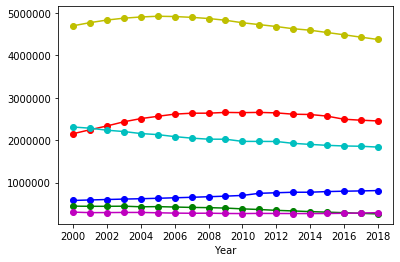

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_of_years, e_inc_num_by_EMRyear, "bo", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_AFRyear, "ro", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_EURyear, "go", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_AMRyear, "mo", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_WPRyear, "co", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_SEAyear, "yo", linestyle="solid")
ax.set_xlabel("Year")
ax.set_ylabel("")
ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
#FIGURE OUT Y TICKS!!!
plt.show()

In [119]:
#What countries have had an increase in cases since 2000?

In [120]:
TB_data_2000 = TB_data[TB_data["year"] == 2000]

In [121]:
TB_2000_candinc =  TB_data_2000[["country", "e_inc_num"]]

In [122]:
TB_2000_index = TB_2000_candinc.set_index("country")

In [123]:
TB_2000_labindex = TB_2000_index.rename(columns = {"e_inc_num":"e_inc_num_2000"})

In [124]:
TB_data_2018 = TB_data[TB_data["year"] == 2018]

In [125]:
TB_2018_candinc =  TB_data_2018[["country", "e_inc_num"]]

In [126]:
TB_2018_index = TB_2018_candinc.set_index("country") 

In [127]:
TB_2018_labindex = TB_2018_index.rename(columns = {"e_inc_num":"e_inc_num_2018"})

In [128]:
TB_2000_2018 = pd.concat([TB_2000_labindex, TB_2018_labindex], axis = 1, join="inner")

In [129]:
TB_greater_2018 = TB_2000_2018[TB_2000_2018["e_inc_num_2018"] > TB_2000_2018["e_inc_num_2000"]]

In [130]:
print(TB_greater_2018)

                                    e_inc_num_2000  e_inc_num_2018
country                                                           
Afghanistan                                  39000           70000
Algeria                                      23000           29000
Angola                                       49000          109000
Antigua and Barbuda                              5               6
Australia                                     1200            1700
...                                            ...             ...
Tunisia                                       2500            4000
Tuvalu                                          18              31
Uganda                                       65000           86000
Uruguay                                        740            1200
Venezuela (Bolivarian Republic of)            8100           14000

[83 rows x 2 columns]


In [136]:
TB_2000_2018["TB_incidence_change"] = TB_2000_2018["e_inc_num_2018"] - TB_2000_2018["e_inc_num_2000"]

In [142]:
TB_greater_2018 = TB_2000_2018[TB_2000_2018["TB_incidence_increase"] >= 0]

In [148]:
TB_greater_2018.reset_index()

,country,e_inc_num_2000,e_inc_num_2018,TB_incidence_increase,TB_incidence_change_ranked
0,Afghanistan,39000,70000,31000,81.0
1,Algeria,23000,29000,6000,69.0
2,Angola,49000,109000,60000,83.0
3,Anguilla,3,3,0,7.0
4,Antigua and Barbuda,5,6,1,11.0
...,...,...,...,...,...
85,Tunisia,2500,4000,1500,49.0
86,Tuvalu,18,31,13,16.0
87,Uganda,65000,86000,21000,80.0
88,Uruguay,740,1200,460,38.0


In [149]:
TB_increase_sort = TB_greater_2018.set_index("TB_incidence_change_ranked")

In [150]:
TB_increase_sort.sort_index() #FIGURE OUT HOW NOT TO LOSE COUNTRIES HERE

,e_inc_num_2000,e_inc_num_2018,TB_incidence_increase
TB_incidence_change_ranked,,,
7.0,0,0,0
7.0,0,0,0
7.0,3,3,0
7.0,0,0,0
7.0,170,170,0
...,...,...,...
86.0,282000,357000,75000
87.0,154000,270000,116000
88.0,460000,591000,131000


In [102]:
print(TB_greater_2018)

                           e_inc_num_2000  e_inc_num_2018  \
country                                                     
Afghanistan                         39000           70000   
Albania                               690             510   
Algeria                             23000           29000   
American Samoa                          3               0   
Andorra                                14               2   
...                                   ...             ...   
Wallis and Futuna Islands               2               0   
West Bank and Gaza Strip              100              38   
Yemen                               20000           14000   
Zambia                              79000           60000   
Zimbabwe                            72000           30000   

                           TB_incidence_increase  TB_incidence_change_ranked  
country                                                                       
Afghanistan                                31000

In [54]:
#FIGURE OUT WHAT AREA EACH OF THESE COUNTRIES IS IN AND WHAT PORTION ARE HIGHER

In [121]:
#Heatmap Code

In [122]:
TB_data_2018_HM = TB_data[TB_data["year"]==2018]

In [126]:
clean_2018 = TB_data_2018_HM.drop(["iso2","iso3", "e_inc_tbhiv_num_hi", "iso_numeric", "g_whoregion", "year", "e_pop_num", "e_inc_100k_lo", "e_tbhiv_prct", "e_inc_100k_hi", "e_inc_num_hi", "e_inc_num_lo", "e_pop_num", "e_tbhiv_prct_lo", "e_tbhiv_prct_hi", "e_inc_tbhiv_100k_lo", "e_inc_tbhiv_100k_hi", "cfr_lo", "cfr_hi", "e_inc_tbhiv_num_lo", "e_mort_num_lo", "cfr_pct_hi", "e_mort_num_hi", "cfr_pct_lo", "c_cdr_lo", "c_cdr_hi", "e_mort_100k_hi", "e_mort_100k_lo", "e_mort_tbhiv_num_hi", "e_mort_tbhiv_num_lo", "e_mort_exc_tbhiv_100k_hi", "e_mort_exc_tbhiv_100k_lo", "e_mort_tbhiv_100k_lo", "e_mort_tbhiv_100k_hi", "e_mort_tbhiv_100k_lo", "e_mort_exc_tbhiv_num_hi", "e_mort_exc_tbhiv_100k_lo", "e_mort_exc_tbhiv_num_lo","e_mort_exc_tbhiv_100k_hi", "e_mort_exc_tbhiv_num", "e_mort_exc_tbhiv_num", "e_mort_num", "e_mort_tbhiv_num", "e_inc_tbhiv_num", "e_inc_num", "e_mort_tbhiv_num", "cfr"], axis=1)

In [127]:
clean_2018 = clean_2018.set_index("country")

In [141]:
clean_2018["Incidence per 100k"] = clean_2018["e_inc_100k"].rank(method="max")

In [142]:
clean_2018["Incidence of HIV positive cases per 100k"] = clean_2018["e_inc_tbhiv_100k"].rank(method="max")

In [143]:
clean_2018["Mortality of HIV negative cases per 100K"] = clean_2018["e_mort_exc_tbhiv_100k"].rank(method="max")

In [144]:
clean_2018["Mortality of HIV positive cases per 100k"] = clean_2018["e_mort_tbhiv_100k"].rank(method="max")

In [145]:
clean_2018["Total mortality per 100k"] = clean_2018["e_mort_100k"].rank(method="max")

In [146]:
clean_2018["Case fatality ratio"] = clean_2018["cfr_pct"].rank(method="max")

In [147]:
clean_2018["New incident cases per 100k"] = clean_2018["c_newinc_100k"].rank(method="max")

In [148]:
clean_2018["Case detection rate"] = clean_2018["c_cdr"].rank(method="max", ascending=False)

In [151]:
rankings_2018 = clean_2018[["Incidence per 100k", "Incidence of HIV positive cases per 100k", "Mortality of HIV negative cases per 100K", "Mortality of HIV positive cases per 100k", "Total mortality per 100k", "Case fatality ratio", "New incident cases per 100k", "Case detection rate"]]

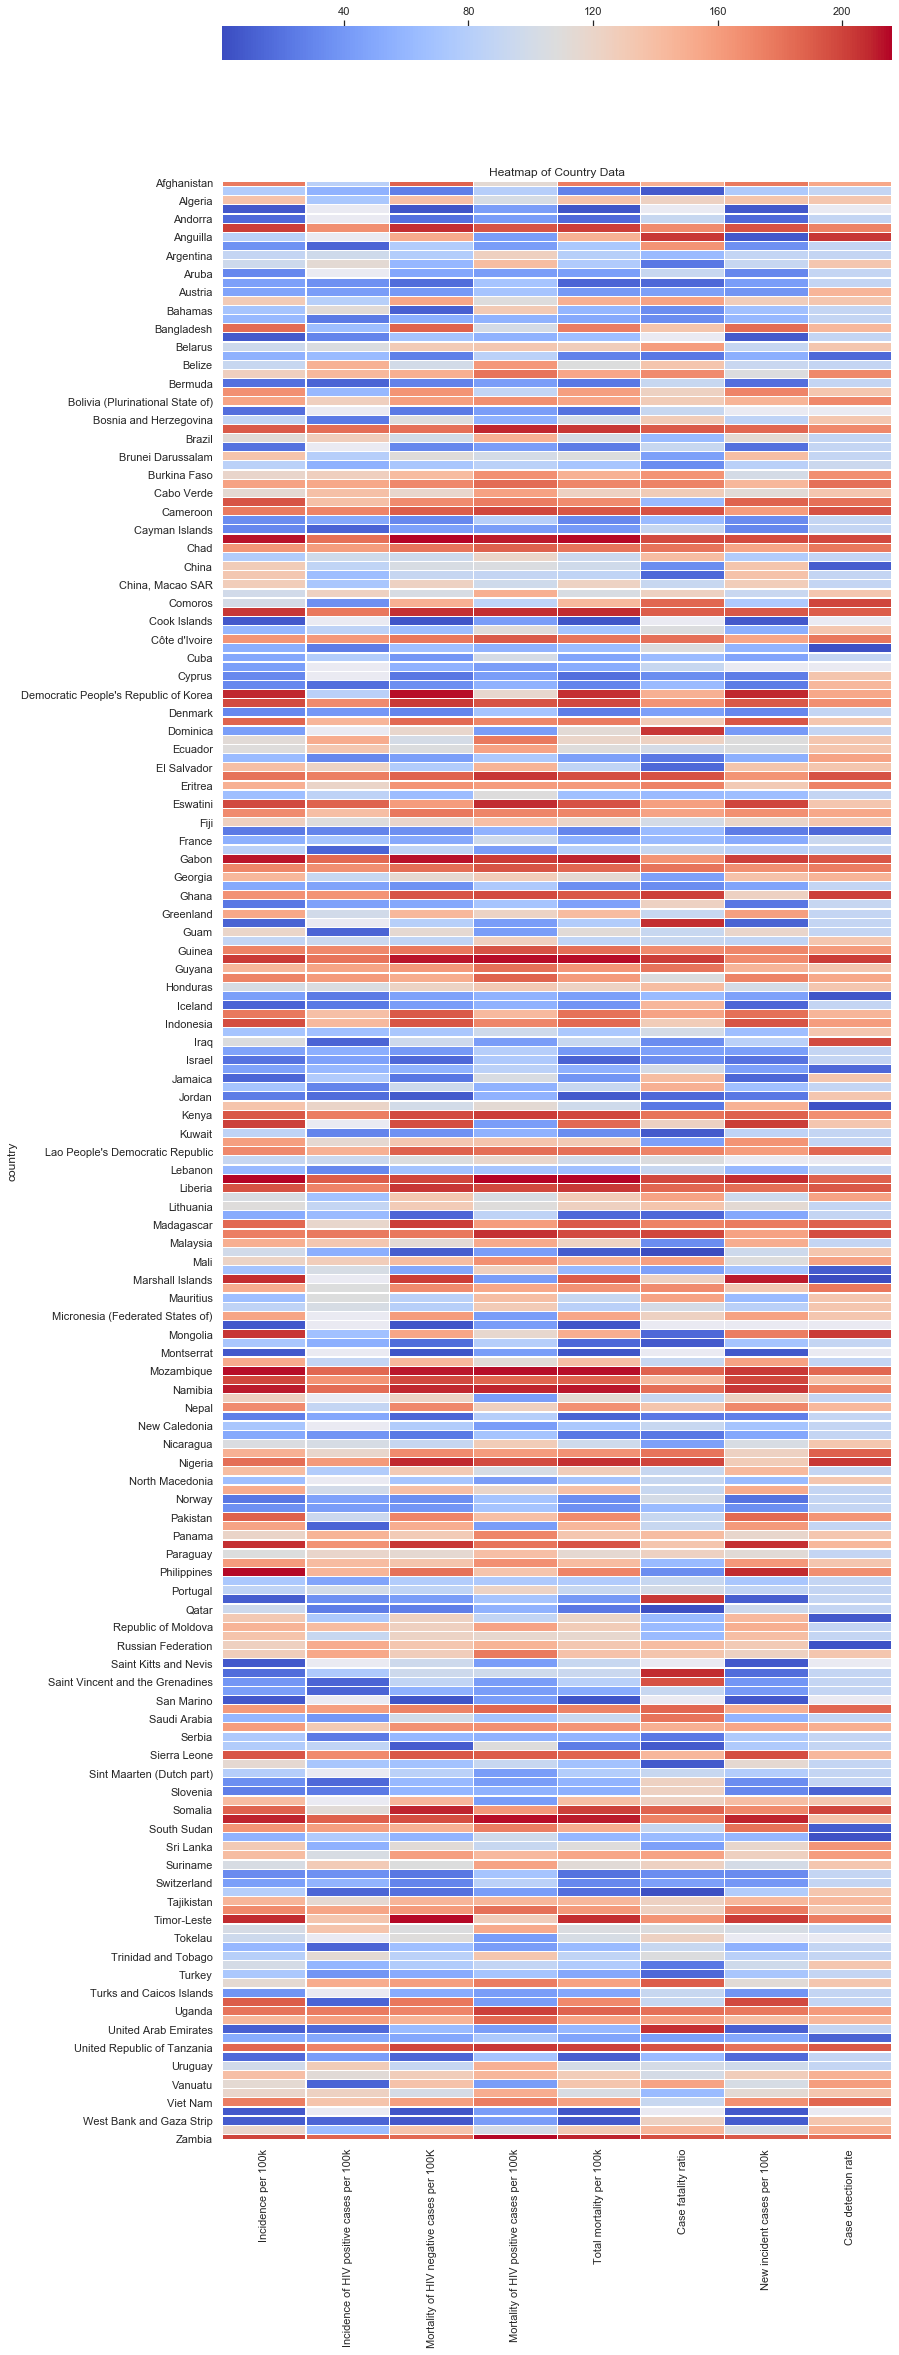

In [162]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
fig_dims=(12,45)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.heatmap(rankings_2018, vmin=1, vmax=216, linewidth=.2, cbar_kws = dict(use_gridspec=False,location="top"), cmap="coolwarm")
# split axes of heatmap to put colorbar
#ax_divider = make_axes_locatable(ax)
# define size and padding of axes for colorbar
#cax = ax_divider.append_axes('top', size = '5%', pad = '2%')
# make colorbar for heatmap. 
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
#colorbar(ax.get_children()[0], cax = cax, orientation = 'horizontal')
# locate colorbar ticks
#cax.xaxis.set_ticks_position('top')
ax.set_title("Heatmap of Country Data")
plt.show()